# Anomaly Detection with Generative Models

Are the simple generative models that we created in the last notebook actually useful for anything? Certainly not for sampling, but perhaps they encode enough information to at least tell us if an image could have originated from our training distribution.

To do this, we're going to consider the *likelihoods* given by our generative model. Since we originally trained our generative model to maximize the likelihood anyways, it makes sense that it should give a high value for the likelihood to images in our training dataset and other images similar to that. The hope is that it would give a low value of the likelihood to other images, not in our distribution. 

For this experiment, we're going to use 3 datasets of 28x28 black-and-white images:
* MNIST
* MNIST-Fashion
* MNIST-Kenji

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scripts import celeba_utils
import os
import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading MNIST Handwritten Digits

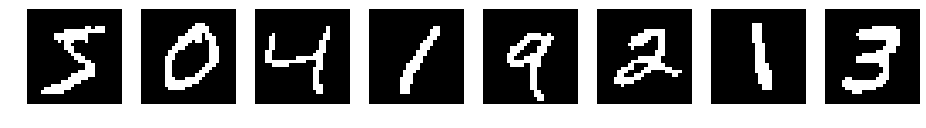

In [6]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.rint(x_train.astype(float)/255)  # Binarize the images.
n_show = 8

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_axis_off()